In [14]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean as cmo

# cartopy 
import cartopy.crs as ccrs       # ccrs contains information about projections
import cartopy    
import cartopy.feature as cfeature

List of files with good swaths:
May 18 138/A2021138.L3m_DAY_CHL_chlor_a_4km.nc
May 22 142/A2021142.L3m_DAY_CHL_chlor_a_4km.nc  
May 23 143/A2021143.L3m_DAY_CHL_chlor_a_4km.nc  
May 24 144/A2021144.L3m_DAY_CHL_chlor_a_4km.nc 
May 25 145/A2021145.L3m_DAY_CHL_chlor_a_4km.nc
May 26 146/A2021146.L3m_DAY_CHL_chlor_a_4km.nc 
May 27 147/A2021147.L3m_DAY_CHL_chlor_a_4km.nc  
May 28 148/A2021148.L3m_DAY_CHL_chlor_a_4km.nc  
May 29 149/A2021149.L3m_DAY_CHL_chlor_a_4km.nc  
May 30 150/A2021150.L3m_DAY_CHL_chlor_a_4km.nc  
May 31 151/A2021151.L3m_DAY_CHL_chlor_a_4km.nc  


MoviePy?

In [2]:
#url = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/275/A2021275.L3m_DAY_CHL_chl_ocx_4km.nc'

In [9]:
modis = xr.open_dataset('https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/142/A2021142.L3m_DAY_CHL_chlor_a_4km.nc')

In [10]:
subset_modis = modis.where( (modis.lon>=-173.5)&(modis.lon<-147)& (modis.lat>=51)&(modis.lat<73), drop=True)

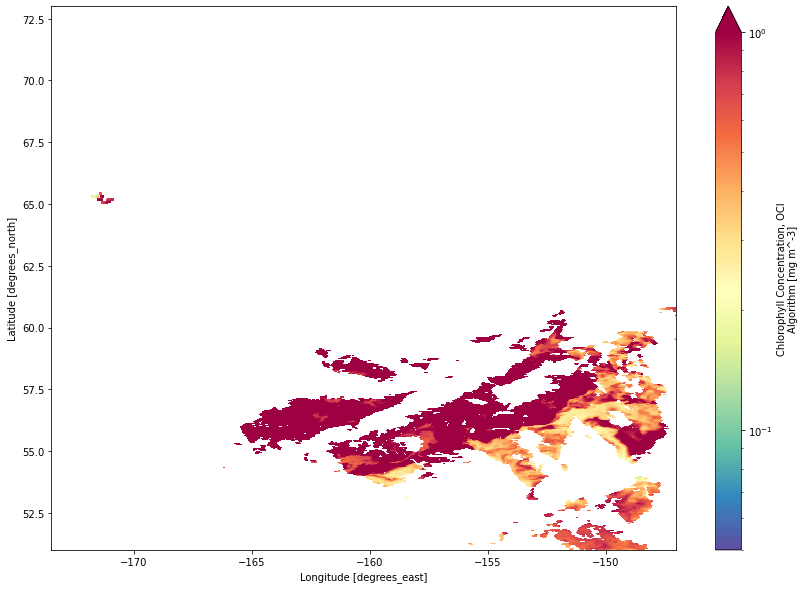

In [11]:
fig, ax = plt.subplots(figsize=(14,10))

subset_modis.chlor_a.plot.pcolormesh(
    x='lon',y='lat', 
    norm=colors.LogNorm(vmin=0.05,vmax=1),
    cmap='Spectral_r'
)

In [ ]:
# Create a for loop that 

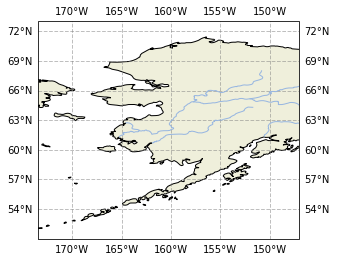

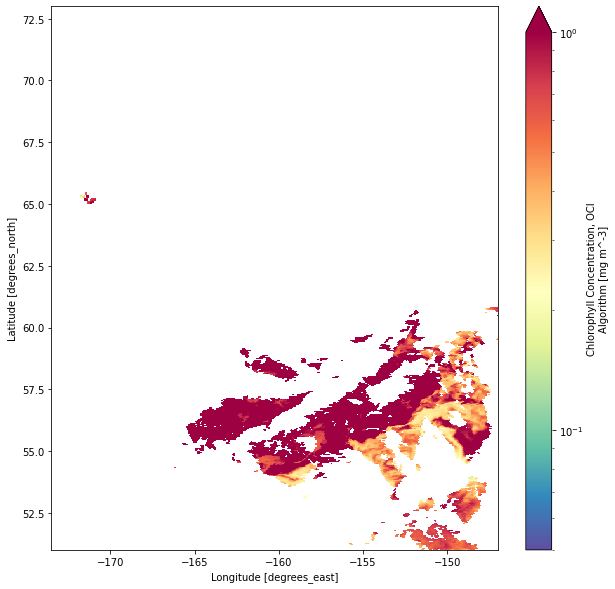

In [20]:
regional_extent = [-173.5, -147, 51, 73]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(regional_extent)
fig = plt.figure(figsize=(10,10))

ax.add_feature(cartopy.feature.LAND,edgecolor='black',zorder=1) 
ax.add_feature(cartopy.feature.RIVERS,zorder=2)

states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)
ax.add_feature(states, edgecolor='gray', zorder=3)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--',
)

subset_modis.chlor_a.plot.pcolormesh(
    x='lon',y='lat', 
    norm=colors.LogNorm(vmin=0.05,vmax=1),
    cmap='Spectral_r',
)